# Area of intersection of two Circles
<br/>

We shall denote distance between the centre of the circles by $d$ and their radii will be denoted as $R_1$ and $R_2$.
## Case 1
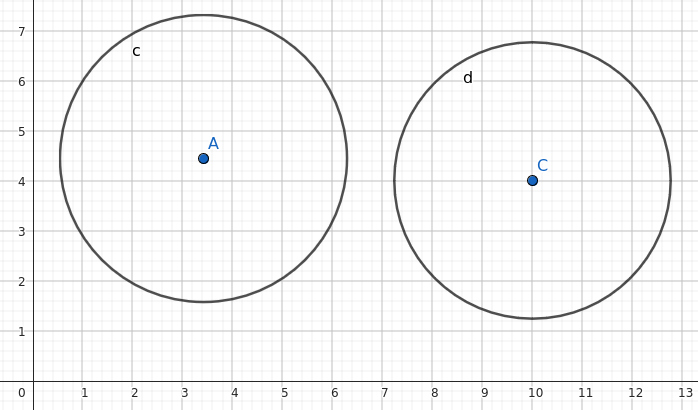

$d \geq (R_1+R_2)$<br/>Common area $=0$ sq units
## Case 2
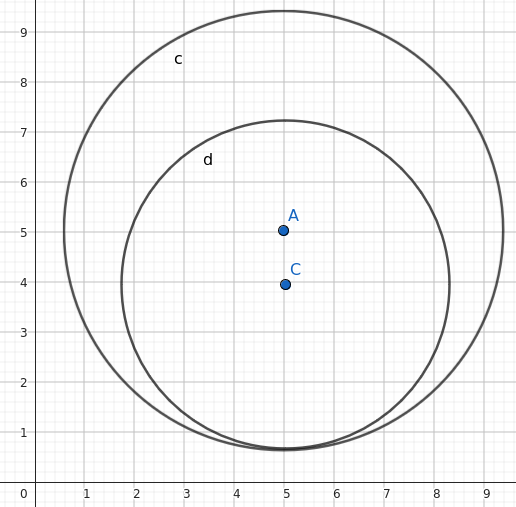

$d \leq |R_1 - R_2|$<br/>Common area $=$ area of the smaller cricle
## Case 3
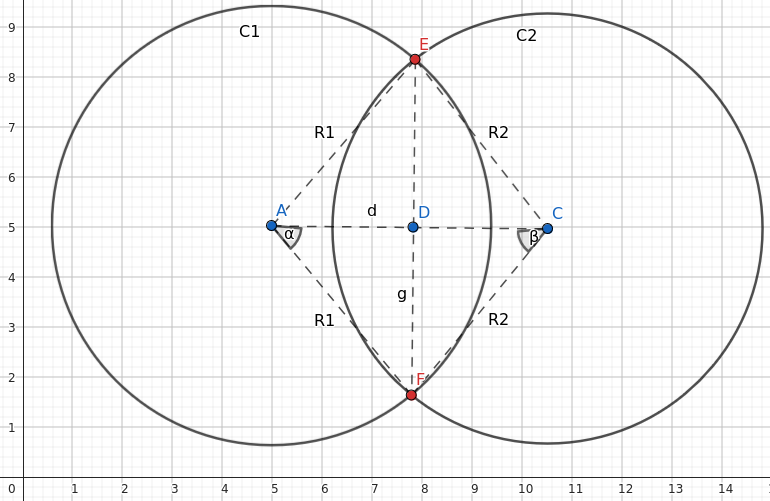

$\alpha$ and $\beta$ can be calculated using the cosine law of triangles.<br/>
$\displaystyle (R_2)^2 = (R_1)^2 + d^2 - 2R_1\times d\times\cos(\alpha)$<br/>
$\displaystyle (R_1)^2 = (R_2)^2 + d^2 - 2R_2\times d\times\cos(\beta)$

$\\g = 2R_1\sin(\alpha)$<br/>
$AD = R_1\cos(\alpha)$<br/>
$CD = R_2\cos(\beta)$

Area of triangle $\displaystyle EAF = \frac{1}{2}\times g\times AD$<br/>
Area of triangle $\displaystyle ECF = \frac{1}{2}\times g\times CD$<br/>

$\displaystyle A_1 = \frac{\alpha}{\pi}\times($Area of $C_1)-$ Area of triangle $EAF$<br/>
$\displaystyle A_2 = \frac{\beta}{\pi}\times($Area of $C_2)-$ Area of triangle $ECF$<br/>
Common Area $=\boxed{A_1+A_2}$

In [1]:
from math import sqrt, acos, pi

class Point:
    def __init__(self, x: int, y: int):
        self.X = x
        self.Y = y
    def __add__(self, p):
        return Point(self.X + p.X, self.Y + p.Y)
    def __sub__(self, p):
        return Point(self.X - p.X, self.Y - p.Y)
    def distance(self) -> float:
        return sqrt(self.X ** 2 + self.Y ** 2)

class Circle:
    def __init__(self, p: Point, r: int):
        self.center = p
        self.radius = r
    def area(self) -> float:
        return pi * (self.radius ** 2)

In [2]:
def intersection(c1: Circle, c2: Circle) -> float:
    d = (c1.center - c2.center).distance()

    if d >= (c1.radius + c2.radius): return 0
    if d <= abs(c1.radius - c2.radius):
        if c1.radius < c2.radius: return c1.area()
        return c2.area()
    
    d_2 = d * d
    r1_2 = c1.radius ** 2
    r2_2 = c2.radius ** 2
    cos_alpha = (r1_2 + d_2 - r2_2) / (2 * c1.radius * d)
    cos_beta = (r2_2 + d_2 - r1_2) / (2 * c2.radius * d)
    sin_alpha = sqrt(1 - cos_alpha ** 2)
    
    alpha = acos(cos_alpha)
    beta = acos(cos_beta)

    g = 2 * sin_alpha * c1.radius
    h1 = cos_alpha * c1.radius
    h2 = cos_beta * c2.radius

    a1 = alpha * r1_2 - (0.5 * g * h1)
    a2 = beta * r2_2 - (0.5 * g * h2)

    return a1 + a2

In [3]:
if __name__ == "__main__":
    c1 = Circle(Point(0, 0), 4)
    c2 = Circle(Point(6, 0), 4)

    area = intersection(c1, c2)
    print(f"Area of intersection = {area} sq units")

Area of intersection = 7.252988063641757 sq units


## Proof
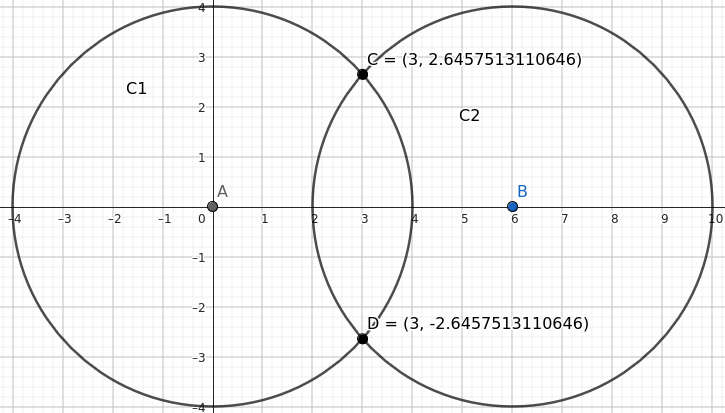<br/>
$C_1: x^2+y^2=16$<br/>
$C_2: (x-6)^2+y^2=16$<br/>

Solving these 2 equations we get<br/>
$x=3,y=\pm\sqrt{7}$<br/>
$\displaystyle\int_{-\sqrt{7}}^{\sqrt{7}}\sqrt{16-y^2}-\left(-\sqrt{16-y^2}+6\right)\ dy=\int_{-\sqrt{7}}^{\sqrt{7}} 2\sqrt{16-y^2}-6\ dy$

$\displaystyle=\left[y\sqrt{16-y^2}+16\arcsin\left(\dfrac{y}{4}\right)-6y\right]_{-\sqrt{7}}^{\sqrt{7}}=\boxed{7.252988063641756}$
***